# Building an Image Classifier Using the Sequential API

### Using Keras to load the dataset

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
tf.__version__

'2.2.0'

In [3]:
keras.__version__

'2.3.0-tf'

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
X_train_full.shape

(60000, 28, 28)

In [6]:
X_train_full.dtype

dtype('uint8')

### Split into a training set and test set, and scale the input features

In [7]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

### Labels

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[0]]

'Coat'

### Creating the model using the Sequential API

In [14]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

### Summary of the model

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Layers information

In [16]:
model.layers

In [17]:
hidden1 = model.layers[1]

In [18]:
hidden1.name

'dense_3'

In [20]:
model.get_layer('dense_3') is hidden1

True

In [22]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.00300917, -0.06855833, -0.01339536, ..., -0.04102171,
        -0.01351037,  0.04577351],
       [-0.06903301, -0.03201067, -0.04806557, ...,  0.0001913 ,
        -0.06586264, -0.06201251],
       [-0.01838378,  0.00130467, -0.06081852, ..., -0.07254954,
         0.06199314, -0.068923  ],
       ...,
       [ 0.01590703, -0.03776332, -0.04391566, ..., -0.06604649,
         0.013106  ,  0.01703125],
       [ 0.0187095 , -0.0049006 ,  0.02737747, ..., -0.00146475,
         0.04364097,  0.05459274],
       [ 0.0466968 , -0.06200787, -0.00697823, ...,  0.04189129,
        -0.06426224, -0.01772945]], dtype=float32)

In [23]:
weights.shape

(784, 300)

In [24]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [25]:
biases.shape

(300,)

### Compiling the model

In [26]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training and evaluating the model

In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7159 - accuracy: 0.7671 - val_loss: 0.5017 - val_accuracy: 0.8370
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4877 - accuracy: 0.8307 - val_loss: 0.4679 - val_accuracy: 0.8420
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4437 - accuracy: 0.8449 - val_loss: 0.4093 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4154 - accuracy: 0.8551 - val_loss: 0.4063 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3964 - accuracy: 0.8605 - val_loss: 0.3906 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3809 - accuracy: 0.8654 - val_loss: 0.3718 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3677 - accuracy: 0.8701 - val_loss: 0.3706 - val_accuracy:

### History training

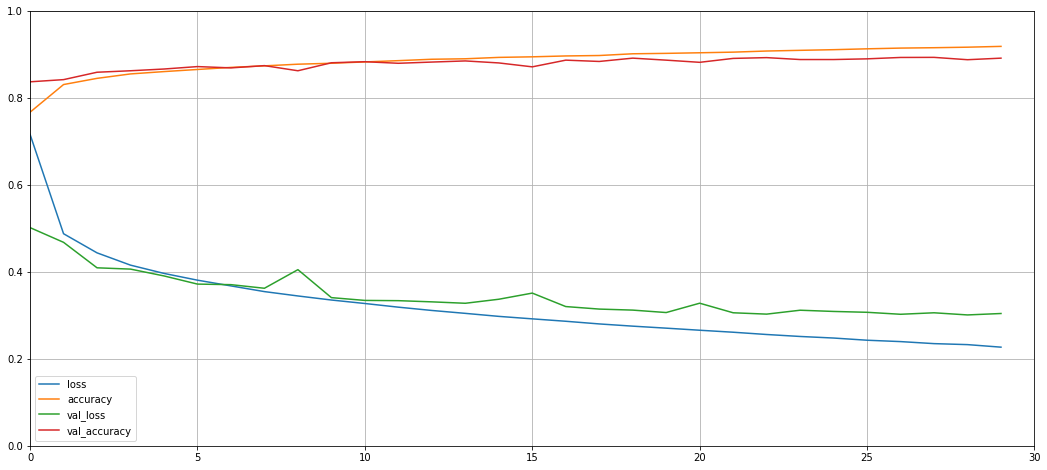

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(18, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.gca().set_xlim(0, 30)
plt.show()

### Evaluate model

In [37]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 743us/step - loss: 0.3389 - accuracy: 0.8791


[0.33887845277786255, 0.8791000247001648]

### Using the model to make predictions

In [38]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [41]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1])

In [42]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')